## Likelihood

# Intuition
A likelihood quantifies how well a statistical model explains observed data. In Bayesian terms, it is the key ingredient in updating prior beliefs to posterior beliefs.

**FIGURE PLACEHOLDER:** ![Likelihood Intuition Cartoon](image_placeholder)

# Definition


In Bayesian statistics, the likelihood is used as part of Bayes' theorem, which is:
$$
P(\theta | \text{data}) = \frac{P(\text{data} | \theta) P(\theta)}{P(\text{data})}
$$

- $P(\theta | \text{data})$ is the posterior probability of the parameters (the updated belief after seeing the data),
- $P(\text{data} | \theta)$ is the **likelihood**, which tells us how probable the data is for a given parameter $\theta$,
- $P(\theta)$ is the prior probability of the parameter before seeing the data (what you believe about the parameter beforehand),
- $P(\text{data})$ is the evidence (or marginal likelihood), which normalizes the distribution.


In Bayesian inference, we are interested in updating our prior beliefs about the parameter $\theta$ based on the observed data. This is where the posterior distribution comes into play.



<!-- 
$L(\theta | X) = f(X | \theta)$

Log-Likelihood: $\ell(\theta | X) = \log f(X | \theta)$

Here, $\theta$ represents the parameters, and $X$ is the observed data.

For a normal distribution: 

$$
\ell(\mu, \sigma^2 | X) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2
$$ -->

# Example

Let's consider to the coin-flipping example. If you want to compute the posterior distribution of $p$ (probability of heads), you would need:

- Likelihood: $L(p) = \binom{n}{k} p^k (1-p)^{n-k}$,

- Prior: Maybe you believe that $p$ should be around 0.5 (a fair coin), but you're not entirely sure. You could use a Beta distribution as a prior, say $\text{Beta}(1,1)$, which is a uniform distribution over $p$ between 0 and 1,

- Posterior: Use Bayes' theorem to combine the likelihood and the prior to get the posterior distribution of $p$.

In [2]:
# Beta prior parameters (uniform prior for simplicity)
prior_alpha <- 1
prior_beta <- 1

In [4]:
# Define the likelihood function (binomial)
likelihood <- function(p, n, k) {
  choose(n, k) * p^k * (1-p)^(n-k)
}


In [5]:
# Beta prior function
beta_prior <- function(p, alpha, beta) {
  dbeta(p, alpha, beta)
}

In [9]:
# Posterior function (likelihood * prior)
posterior <- function(p, n, k, alpha, beta) {
  likelihood(p, n, k) * beta_prior(p, alpha, beta)
}

In [10]:
# Normalize the posterior (integrate over p to make sure it's a valid distribution)
normalize_posterior <- function(n, k, alpha, beta) {
  integral <- integrate(posterior, 0, 1, n=n, k=k, alpha=alpha, beta=beta)
  function(p) posterior(p, n, k, alpha, beta) / integral$value
}


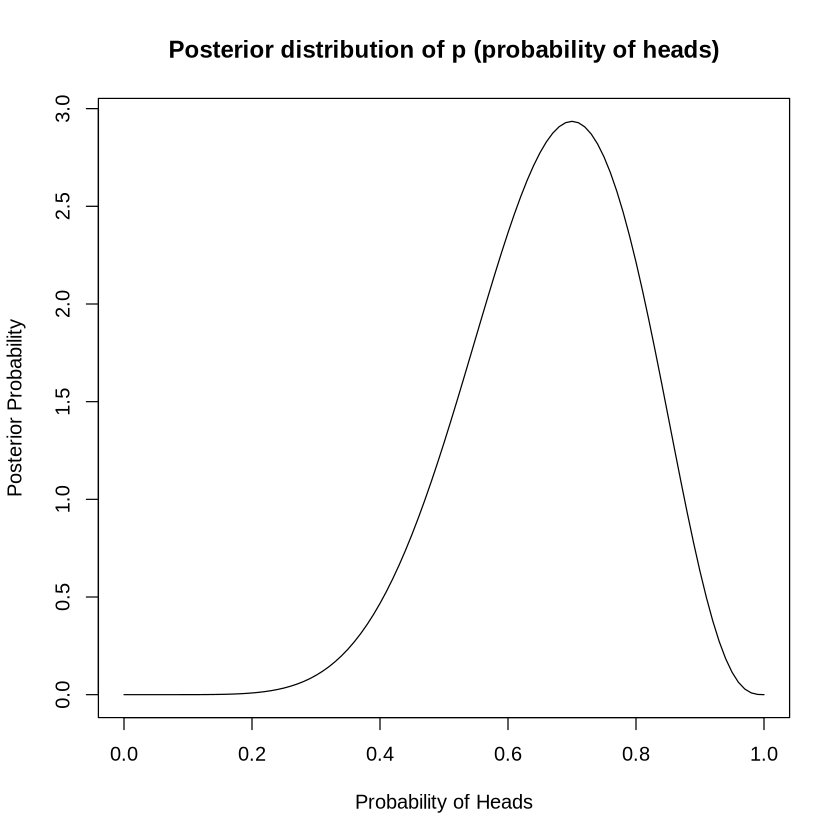

In [12]:
# Example:
## in the observed data, there are 10 flips, 7 heads
n <- 10
k <- 7
normalized_posterior <- normalize_posterior(n, k, prior_alpha, prior_beta)

# Plot posterior distribution for p
p_values <- seq(0, 1, by = 0.01)
posterior_values <- sapply(p_values, normalized_posterior)

plot(p_values, posterior_values, type="l", main="Posterior distribution of p (probability of heads)", xlab="Probability of Heads", ylab="Posterior Probability")


In this plot, you'll see that the posterior distribution reflects both the data (7 heads out of 10 flips) and the prior belief about $p$ (the Beta prior). The posterior distribution gives us the updated belief about $p$, which in this case will be skewed towards 0.7, but it still incorporates the prior belief.

## Summary

- In Bayesian inference, the likelihood is combined with a prior to form the posterior distribution of the parameters. The posterior incorporates both the data and prior beliefs.
- By using the Bayesian framework, we get a distribution over the parameter values (e.g., $p$ for the coin flip) rather than a single point estimate, and we can make probabilistic statements about the parameter values.

# Recommended Reading

- Statistical Rethinking, 2nd Edition, Section 2.1, 2.3, 2.4.

# Supple

- maybe another example of normal distribution?